In [1]:
# EXP 2: TRAIN = AUGMENTED, VAL = AUGMENTED, TEST = REAL
# 1k of augmented images/class where the fake is the dominant and the real is the filler (70-30)

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

In [3]:
# Train and Val sets (AUGMENTED)

In [32]:
train_data = tf.keras.utils.image_dataset_from_directory(r"E:\bachelor\speed bumps (augmented)\augmented", batch_size= 100)
data_iterator = train_data.as_numpy_iterator()
batch = data_iterator.next()

Found 2000 files belonging to 2 classes.


In [33]:
data = train_data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.24929631, 0.20424901, 0.1779249 ],
          [0.21991517, 0.17677791, 0.16109164],
          [0.09784486, 0.07823702, 0.06579829],
          ...,
          [0.52604455, 0.494672  , 0.4501867 ],
          [0.46436793, 0.43299538, 0.383363  ],
          [0.442783  , 0.42951038, 0.39578545]],
 
         [[0.18583506, 0.14796741, 0.12180319],
          [0.10526004, 0.06212278, 0.03871975],
          [0.18916208, 0.1590849 , 0.14343405],
          ...,
          [0.44885397, 0.41748142, 0.36650103],
          [0.48241612, 0.45689625, 0.41381836],
          [0.3824458 , 0.36674902, 0.35114506]],
 
         [[0.0807215 , 0.05106177, 0.03140127],
          [0.10456783, 0.06535213, 0.03168658],
          [0.22806756, 0.18603323, 0.16234873],
          ...,
          [0.65474683, 0.6301145 , 0.575764  ],
          [0.46801472, 0.44056374, 0.40134802],
          [0.40759805, 0.39191177, 0.38541666]],
 
         ...,
 
         [[0.39715362, 0.3622214 , 0.32710823],
          [0.52784

In [34]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.2)

In [35]:
len(data)

20

In [36]:
val_size

4

In [37]:
train_size

16

In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [ ]:
# TEST SET (REAL)

In [39]:
test_data = tf.keras.utils.image_dataset_from_directory(r"E:\bachelor\speed bumps (augmented)\real", batch_size= 100)
data_iterator = test_data.as_numpy_iterator()
batch1 = data_iterator.next()

Found 1107 files belonging to 2 classes.


In [40]:
test_data = test_data.map(lambda x,y: (x/255, y))
test_data.as_numpy_iterator().next()

(array([[[[0.37377068, 0.33835402, 0.22511873],
          [0.18348269, 0.15603171, 0.05079465],
          [0.25534046, 0.2122032 , 0.12715419],
          ...,
          [0.61237746, 0.6084559 , 0.58884805],
          [0.62538296, 0.62538296, 0.5940104 ],
          [0.6313726 , 0.6313726 , 0.5921569 ]],
 
         [[0.8827905 , 0.83953065, 0.7302169 ],
          [0.42063946, 0.3924532 , 0.27872768],
          [0.45176739, 0.42717284, 0.34470645],
          ...,
          [0.62345284, 0.6195313 , 0.59992343],
          [0.6290987 , 0.6290987 , 0.59772617],
          [0.62002146, 0.62002146, 0.5808058 ]],
 
         [[0.4584147 , 0.39205202, 0.2905685 ],
          [0.3852453 , 0.35820073, 0.25537395],
          [0.10449698, 0.05412933, 0.02516803],
          ...,
          [0.60825676, 0.6043352 , 0.58472735],
          [0.62282574, 0.62282574, 0.59145314],
          [0.62732846, 0.62732846, 0.5881128 ]],
 
         ...,
 
         [[0.48332137, 0.4166547 , 0.3539096 ],
          [0.56615

In [41]:
test_size = int(len(test_data))

In [42]:
test_size

12

In [43]:
test = test_data.take(test_size)

In [44]:
# THE MODEL

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), activation='relu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         803,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 813,041 (3.10 MB)

 Trainable params: 813,041 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [49]:
# TRAINING

In [50]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 403ms/step - accuracy: 0.4910 - loss: 1.1844 - val_accuracy: 0.6100 - val_loss: 1.0014
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 614ms/step - accuracy: 0.6393 - loss: 0.9621 - val_accuracy: 0.7250 - val_loss: 0.8158
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 417ms/step - accuracy: 0.7242 - loss: 0.7976 - val_accuracy: 0.7575 - val_loss: 0.7011
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 743ms/step - accuracy: 0.7853 - loss: 0.6668 - val_accuracy: 0.8475 - val_loss: 0.5693
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 549ms/step - accuracy: 0.8469 - loss: 0.5483 - val_accuracy: 0.7950 - val_loss: 0.6303
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 449ms/step - accuracy: 0.8445 - loss: 0.5392 - val_accuracy: 0.9225 - val_loss: 0.4008
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 516ms/step - accuracy: 0.8978 - loss: 0.4411 - val_accuracy: 0.9200 - val_loss: 0.3796
Epoch 8/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 384ms/step - accuracy: 0.9269 - loss: 0.3694 - val_accurac

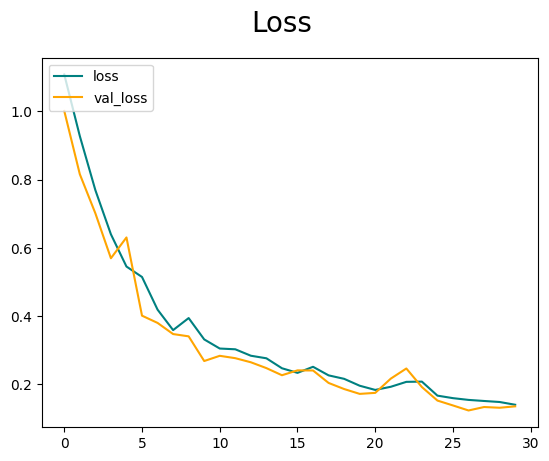

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

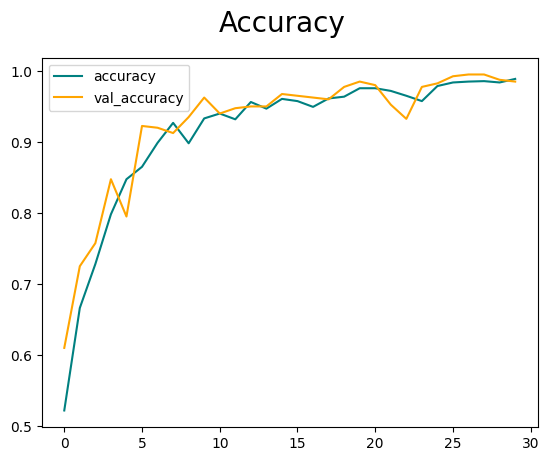

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [53]:
# TESTING 
test_loss, test_acc = model.evaluate(test, verbose=1)
print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.8687 - loss: 0.4334
Test Accuracy: 0.8726287484169006
Test Loss: 0.4543505609035492
